In [1]:
import torch

from sbi import analysis as analysis
from sbi.analysis import pairplot
from sbi.inference import NPE, simulate_for_sbi
from sbi.utils import BoxUniform 
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

import numpy as np

In [ ]:
num_dim = 4
prior_bound_min = -2
prior_bound_max = 2
prior = BoxUniform(low=prior_bound_min * torch.ones(num_dim), high=prior_bound_max * torch.ones(num_dim))


def simulator(theta):
    x_size = 500
    x = np.linspace(-10,10, num = x_size) 
    phi = np.zeros(shape = (num_dim,x_size))
    for n in range(num_dim):
        phi[n,:] = x ** n

    #phi.reshape(len(phi),1)
    phi = torch.tensor(phi).float()

    y = torch.matmul(theta,phi) 
    #Add noise
    y += torch.randn_like(y) * 0.1
    return y

# Check prior, simulator, consistency
prior, num_parameters, prior_returns_numpy = process_prior(prior)
simulator = process_simulator(simulator, prior, prior_returns_numpy)
check_sbi_inputs(simulator, prior)

# Create inference object. Here, NPE is used.
inference = NPE(prior=prior, density_estimator="zuko_maf")

#generate simulations and pass to the inference object
theta, y = simulate_for_sbi(simulator, proposal=prior, num_simulations=2000)
inference = inference.append_simulations(theta, y)

# train the density estimator and build the posterior
density_estimator = inference.train()
posterior = inference.build_posterior(density_estimator)



  0%|          | 0/2000 [00:00<?, ?it/s]

 Training neural network. Epochs trained: 122

In [ ]:
theta_true = prior.sample((1,))
# generate our observation
y_obs = simulator(theta_true)

samples = posterior.sample((10000,), x=y_obs)

_ = analysis.pairplot(
    samples, 
    limits=[[prior_bound_min, prior_bound_max], [prior_bound_min, prior_bound_max], [prior_bound_min, prior_bound_max],[prior_bound_min, prior_bound_max]],
    figsize=(8, 8),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$", r"$\theta_4$"],
    points=theta_true # add ground truth thetas,
)

In [4]:
import matplotlib.pyplot as plt

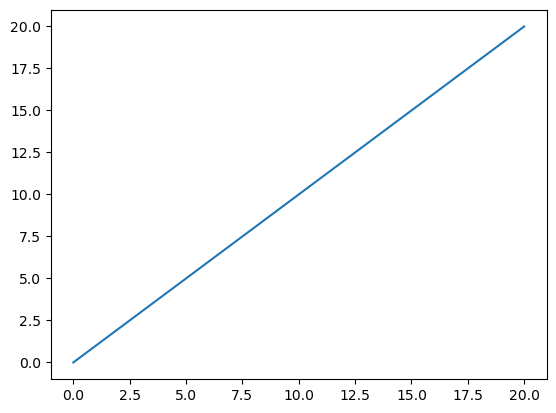

In [5]:
plt.plot(np.linspace(0,20,20),np.linspace(0,20,20))